In [43]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from collections import Counter

import matplotlib.pyplot as plt
% matplotlib inline

In [44]:
file="data/train.json"
df = pd.read_json(file, orient='columns')
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


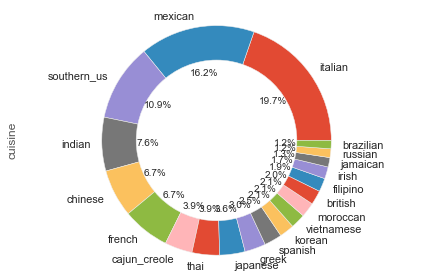

In [95]:
# %matplotlib
# plt.style.use('ggplot')
df['cuisine'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')
total=df['cuisine'].value_counts()

centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

plt.plot(figsize=(100, 60))

plt.savefig('pie.png')

In [46]:
# total

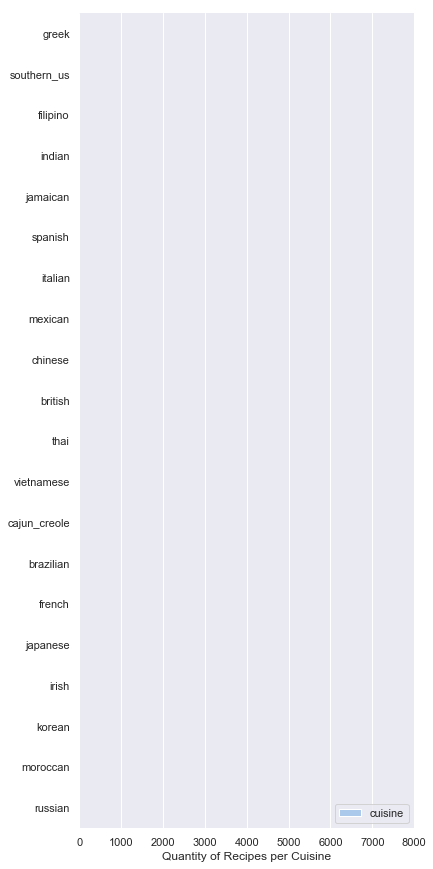

In [47]:
sns.set(color_codes=True)
f, ax = plt.subplots(figsize=(6, 15))
total=df['cuisine'].value_counts()

sns.set_color_codes("pastel")
sns.barplot(x=total, y="cuisine", data=df,
            label="cuisine", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 8000), ylabel="",
       xlabel="Quantity of Recipes per Cuisine")
sns.despine(left=True, bottom=True)

In [48]:
counters = {}
for cuisine in df['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df['cuisine'] == cuisine)
    for ingredients in df[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [59]:
top_ingredients = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(5)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top {}'.format(i) for i in range(1, 6)])
top_ingredients

,top 1,top 2,top 3,top 4,top 5
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles
southern_us,salt,butter,all-purpose flour,sugar,large eggs
filipino,salt,garlic,water,onions,soy sauce
indian,salt,onions,garam masala,water,ground turmeric
jamaican,salt,onions,water,garlic,ground allspice
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic
mexican,salt,onions,ground cumin,garlic,olive oil
chinese,soy sauce,sesame oil,salt,corn starch,sugar
british,salt,all-purpose flour,butter,milk,eggs


In [60]:
popularity_df=df
popularity_df['all_ingredients'] = popularity_df['ingredients'].map(";".join)

popularity_df.head()

,cuisine,id,ingredients,all_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


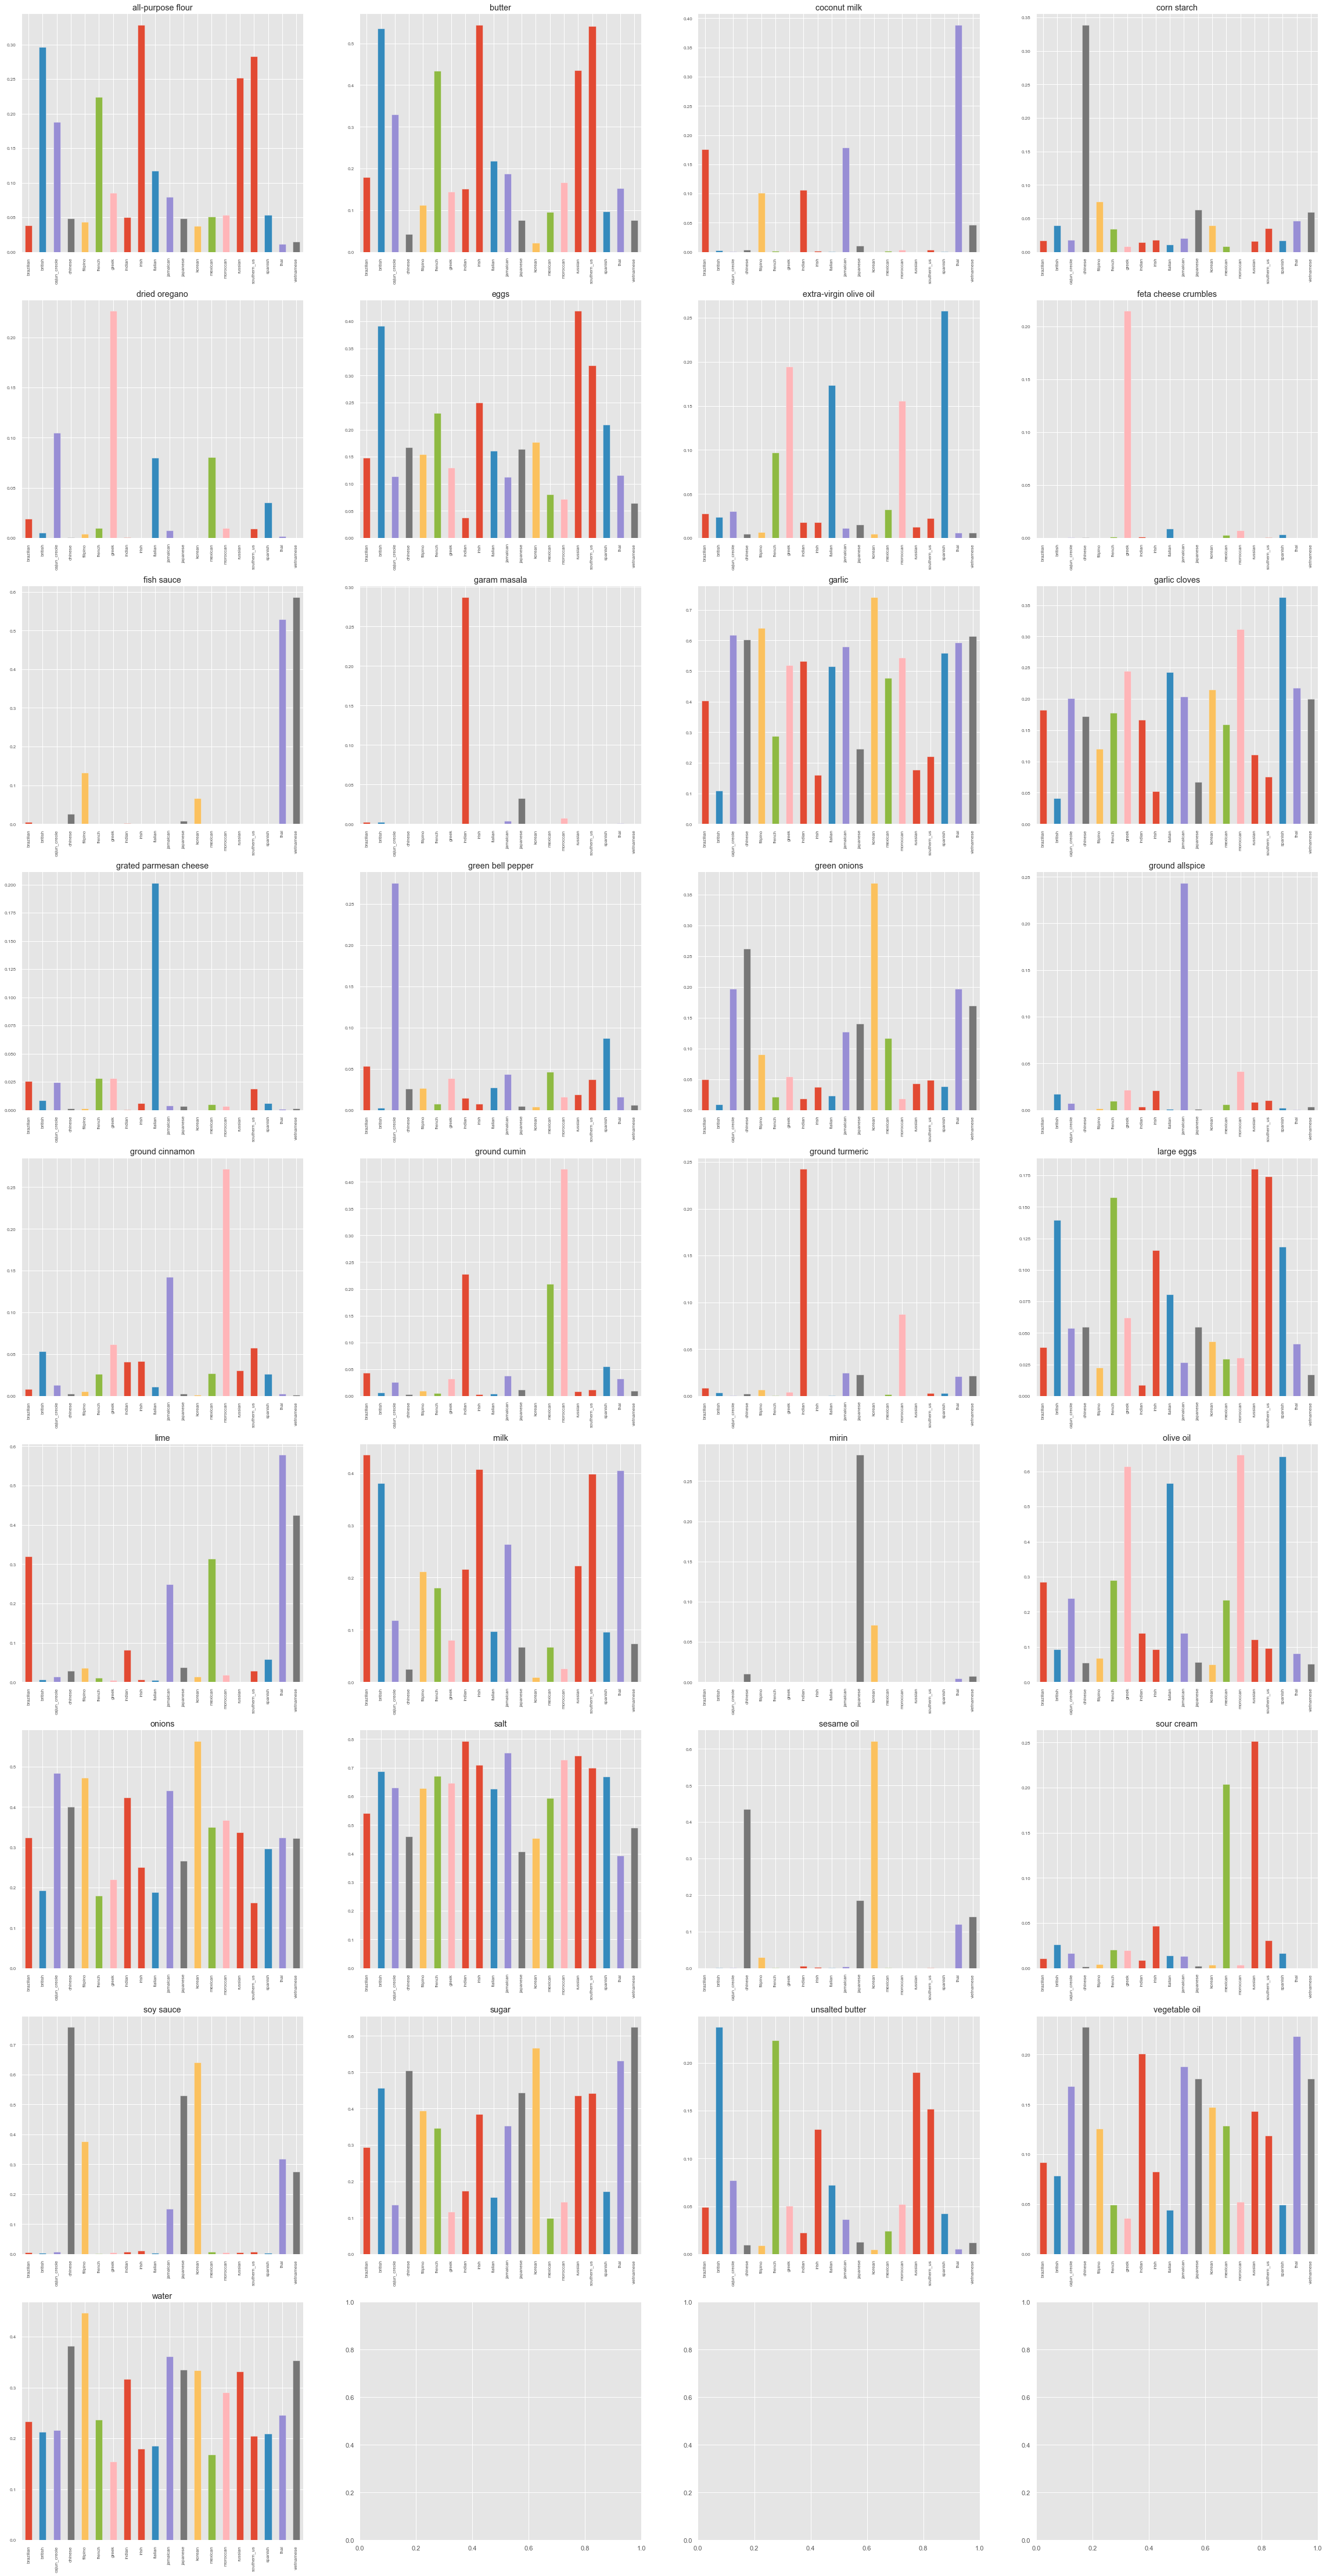

In [100]:
unique = np.unique(top_ingredients.values.ravel())

fig, axes = plt.subplots(9, 4, figsize=(40, 80))
for ingredient, ax_index in zip(unique, range(64)):
    indices = popularity_df['all_ingredients'].str.contains(ingredient)
    relative_freq = (popularity_df[indices]['cuisine'].value_counts() / popularity_df['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=8, title=ingredient)
    plt.savefig("subplots.png")

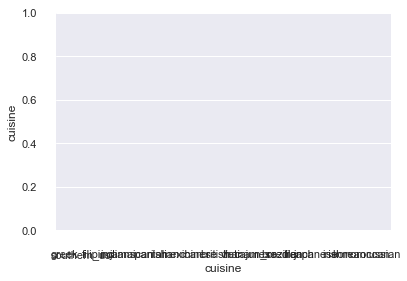